# XGBoost代码实现2

In [32]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#### 读取数据(把libsvm格式读取成以前我们常用的二维数组形式)

In [1]:
from sklearn.datasets import load_svmlight_file
#data_train = xgb.DMatrix('data/agaricus.txt.train')
#data_test = xgb.DMatrix('data/agaricus.txt.test')
X_train,y_train = load_svmlight_file('data/agaricus.txt.train')
X_test,y_test = load_svmlight_file('data/agaricus.txt.test')

In [6]:
X_train.toarray().shape

(6513, 126)

#### 设置参数

In [9]:
model =xgb.XGBClassifier(max_depth=2, learning_rate=1, n_estimators=6, 
                   silent=True, objective='binary:logistic')

model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=1,
              max_delta_step=0, max_depth=2, min_child_weight=1, missing=None,
              n_estimators=6, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
              subsample=1, verbosity=1)

#### 计算准确率

In [13]:
# 训练集上准确率
train_preds = model.predict(X_train)
train_predictions = [round(value) for value in train_preds]

train_accuracy = accuracy_score(y_train, train_predictions)
print ("Train Accuary: %.2f%%" % (train_accuracy * 100.0))


Train Accuary: 99.88%


In [15]:
# 测试集上准确率
# make prediction
preds = model.predict(X_test)
predictions = [round(value) for value in preds]

test_accuracy = accuracy_score(y_test, predictions)
print("Test Accuracy: %.2f%%" % (test_accuracy * 100.0))

Test Accuracy: 100.00%


# GridSearchcv 搜索最优参数

In [21]:
from sklearn.model_selection import GridSearchCV

In [24]:
model = xgb.XGBClassifier(learning_rate=0.1, silent=True, objective='binary:logistic')
param_grid = {
 'n_estimators': range(1, 51, 1),
 'max_depth':range(1,10,1)
}
clf = GridSearchCV(model, param_grid, "accuracy",cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=True,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(1, 10),
                         'n_estimators': range(1, 51)},
             pre_dispatch='2*n_jobs', refit=True, return_tr

In [25]:
clf.best_params_, clf.best_score_

({'max_depth': 2, 'n_estimators': 30}, 0.9841854752034392)

# early-stop

我们设置验证valid集，当我们迭代过程中发现在验证集上错误率增加，则提前停止迭代。

In [26]:
from sklearn.model_selection import train_test_split

In [28]:
X_train_part, X_validate, y_train_part, y_validate = train_test_split(X_train, y_train, test_size=0.3,random_state=0)

In [29]:
# 设置boosting迭代计算次数
num_round = 100

bst =xgb.XGBClassifier(max_depth=2, learning_rate=0.1, n_estimators=num_round, silent=True, objective='binary:logistic')

eval_set =[(X_validate, y_validate)]
bst.fit(X_train_part, y_train_part, early_stopping_rounds=10, eval_metric="error",
    eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.048618
Will train until validation_0-error hasn't improved in 10 rounds.
[1]	validation_0-error:0.042989
[2]	validation_0-error:0.048618
[3]	validation_0-error:0.042989
[4]	validation_0-error:0.048618
[5]	validation_0-error:0.048618
[6]	validation_0-error:0.042989
[7]	validation_0-error:0.042989
[8]	validation_0-error:0.042989
[9]	validation_0-error:0.042989
[10]	validation_0-error:0.042989
[11]	validation_0-error:0.024053
[12]	validation_0-error:0.029683
[13]	validation_0-error:0.019447
[14]	validation_0-error:0.019447
[15]	validation_0-error:0.019447
[16]	validation_0-error:0.019447
[17]	validation_0-error:0.019447
[18]	validation_0-error:0.019447
[19]	validation_0-error:0.019447
[20]	validation_0-error:0.019447
[21]	validation_0-error:0.026612
[22]	validation_0-error:0.023541
[23]	validation_0-error:0.023541
Stopping. Best iteration:
[13]	validation_0-error:0.019447



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1, verbosity=1)

In [30]:
results = bst.evals_result()
results

{'validation_0': {'error': [0.048618,
   0.042989,
   0.048618,
   0.042989,
   0.048618,
   0.048618,
   0.042989,
   0.042989,
   0.042989,
   0.042989,
   0.042989,
   0.024053,
   0.029683,
   0.019447,
   0.019447,
   0.019447,
   0.019447,
   0.019447,
   0.019447,
   0.019447,
   0.019447,
   0.026612,
   0.023541]}}

#### 我们可以将上面的错误率进行可视化，方便我们更直观的观察

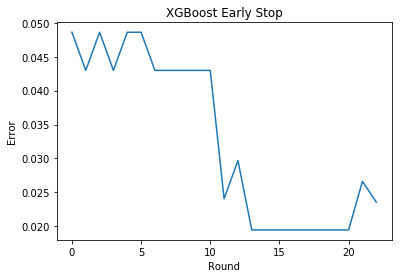

In [33]:
results = bst.evals_result()
#print(results)

epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

# plot log loss

plt.plot(x_axis, results['validation_0']['error'], label='Test')

plt.ylabel('Error')
plt.xlabel('Round')
plt.title('XGBoost Early Stop')
plt.show()

# 学习曲线

In [35]:
# 设置boosting迭代计算次数
num_round = 100

# 没有 eraly_stop
bst =xgb.XGBClassifier(max_depth=2, learning_rate=0.1, n_estimators=num_round, silent=True, objective='binary:logistic')
 
eval_set = [(X_train_part, y_train_part), (X_validate, y_validate)]
bst.fit(X_train_part, y_train_part, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.045624	validation_0-logloss:0.614662	validation_1-error:0.048618	validation_1-logloss:0.615088
[1]	validation_0-error:0.041018	validation_0-logloss:0.550026	validation_1-error:0.042989	validation_1-logloss:0.550209
[2]	validation_0-error:0.045624	validation_0-logloss:0.495522	validation_1-error:0.048618	validation_1-logloss:0.49614
[3]	validation_0-error:0.041018	validation_0-logloss:0.449244	validation_1-error:0.042989	validation_1-logloss:0.449696
[4]	validation_0-error:0.045624	validation_0-logloss:0.409657	validation_1-error:0.048618	validation_1-logloss:0.410504
[5]	validation_0-error:0.045624	validation_0-logloss:0.375021	validation_1-error:0.048618	validation_1-logloss:0.375261
[6]	validation_0-error:0.041018	validation_0-logloss:0.343731	validation_1-error:0.042989	validation_1-logloss:0.344092
[7]	validation_0-error:0.041018	validation_0-logloss:0.316475	validation_1-error:0.042989	validation_1-logloss:0.316797
[8]	validation_0-error:0.041018	validatio

[68]	validation_0-error:0.001535	validation_0-logloss:0.027707	validation_1-error:0.003071	validation_1-logloss:0.02948
[69]	validation_0-error:0.001535	validation_0-logloss:0.027084	validation_1-error:0.003071	validation_1-logloss:0.02896
[70]	validation_0-error:0.001535	validation_0-logloss:0.026461	validation_1-error:0.003071	validation_1-logloss:0.028341
[71]	validation_0-error:0.001535	validation_0-logloss:0.025886	validation_1-error:0.003071	validation_1-logloss:0.027733
[72]	validation_0-error:0.001535	validation_0-logloss:0.025325	validation_1-error:0.003071	validation_1-logloss:0.027121
[73]	validation_0-error:0.001535	validation_0-logloss:0.024787	validation_1-error:0.003071	validation_1-logloss:0.02663
[74]	validation_0-error:0.001535	validation_0-logloss:0.024274	validation_1-error:0.003071	validation_1-logloss:0.025998
[75]	validation_0-error:0.001535	validation_0-logloss:0.023756	validation_1-error:0.003071	validation_1-logloss:0.02553
[76]	validation_0-error:0.001535	val

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1, verbosity=1)

In [36]:
results = bst.evals_result()
results

{'validation_0': {'error': [0.045624,
   0.041018,
   0.045624,
   0.041018,
   0.045624,
   0.045624,
   0.041018,
   0.041018,
   0.041018,
   0.041018,
   0.041018,
   0.023031,
   0.028954,
   0.016451,
   0.016451,
   0.016451,
   0.016451,
   0.016451,
   0.016451,
   0.016451,
   0.016451,
   0.025005,
   0.020619,
   0.020619,
   0.020619,
   0.020619,
   0.020619,
   0.020619,
   0.020619,
   0.020619,
   0.020619,
   0.020619,
   0.020619,
   0.020619,
   0.020619,
   0.020619,
   0.014696,
   0.01009,
   0.014696,
   0.001535,
   0.001535,
   0.001535,
   0.001535,
   0.001535,
   0.001535,
   0.001535,
   0.001535,
   0.001535,
   0.001535,
   0.001535,
   0.001535,
   0.001535,
   0.001535,
   0.001535,
   0.001535,
   0.001535,
   0.001535,
   0.001535,
   0.001535,
   0.001535,
   0.001535,
   0.001535,
   0.001535,
   0.001535,
   0.001535,
   0.001535,
   0.001535,
   0.001535,
   0.001535,
   0.001535,
   0.001535,
   0.001535,
   0.001535,
   0.001535,
   0.001535,
 

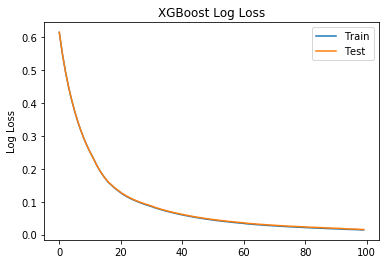

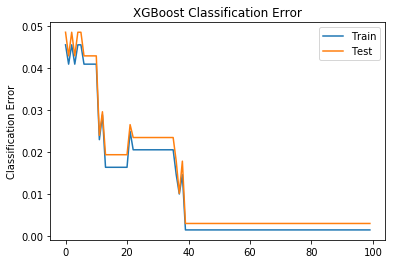

In [38]:
# retrieve performance metrics
results = bst.evals_result()
#print(results)


epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()